# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Grosse Veränderungen der Säuglingssterblichkeiten
### 1.2 Gruppe:
- Valeria Schönyan, Jessica Schmid, Simon Mettler
### 1.3 Fragestellung:
- Welche Länder hatten seit 1990 die grösste Zunahme/Abnahme der Sterblichkeit bei Säuglingen (< 1 Jahr auf 100 Lebendgeburten)?
- Was sind die Gründe dafür?   
### 1.4 Datenquelle(n):
- https://ourworldindata.org/grapher/infant-mortality?tab=table&country=USA~MEX~DEU~ZAF




### 1.5 Daten beschaffen und laden

In [5]:


import pandas as pd


In [6]:


df = pd.read_csv('infant-mortality.csv', skiprows=1,
                 names=['Land','Code','Jahr','Sterblichkeit']) 
df  

,Land,Code,Jahr,Sterblichkeit
0,Afghanistan,AFG,1957,26.094225
1,Afghanistan,AFG,1958,25.776396
2,Afghanistan,AFG,1959,25.467907
3,Afghanistan,AFG,1960,25.123142
4,Afghanistan,AFG,1961,24.839281
...,...,...,...,...
13572,Zimbabwe,ZWE,2019,4.596266
13573,Zimbabwe,ZWE,2020,4.489809
13574,Zimbabwe,ZWE,2021,4.362161
13575,Zimbabwe,ZWE,2022,4.222358


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [7]:
df_pivot = df.pivot_table(
    index='Land',
    columns='Jahr',
    values='Sterblichkeit',
    aggfunc='mean'
)


df_pivot.head()

Jahr,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.635821,6.421486,6.225403,6.040129,5.863033,5.693236,5.528115,5.364005,5.198535,5.036440
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.958952,4.859064,4.756677,4.668392,4.474101,4.363954,4.240653,4.145499,4.101093,3.931096
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.776530,0.762981,0.761810,0.769265,0.781825,0.797022,0.811845,0.824619,0.831452,0.831589
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.230713,2.193941,2.159699,2.127168,2.096677,2.067920,2.042712,2.017561,1.996700,1.974315
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.352169,0.335916,0.320248,0.306298,0.294897,0.284046,0.273821,0.265141,0.256313,0.247736


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [8]:
print('Anzahl verschiedener Länder: ', len(df['Land'].unique()))

Anzahl verschiedener Länder:  212


In [9]:

df['Land'].value_counts()

Land
Ghana                            92
Brazil                           90
Guinea                           87
Fiji                             84
Samoa                            84
                                 ..
High-income countries            34
Low-income countries             34
Lower-middle-income countries    34
Upper-middle-income countries    34
World                            34
Name: count, Length: 212, dtype: int64

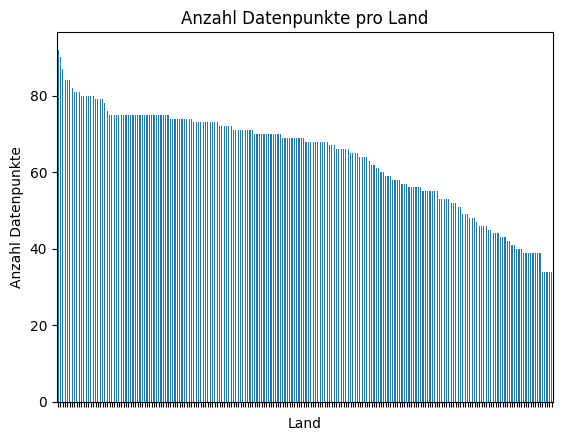

In [10]:
ax = df['Land'].value_counts().plot(kind='bar', ylabel='Anzahl Datenpunkte', title="Anzahl Datenpunkte pro Land")
ax.set_xticklabels([]);

## 3.2 Analyse Jahr

In [11]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  92


In [12]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1932      1
1933      1
1934      2
1935      2
1936      2
       ... 
2019    212
2020    212
2021    212
2022    212
2023    212
Name: count, Length: 92, dtype: int64

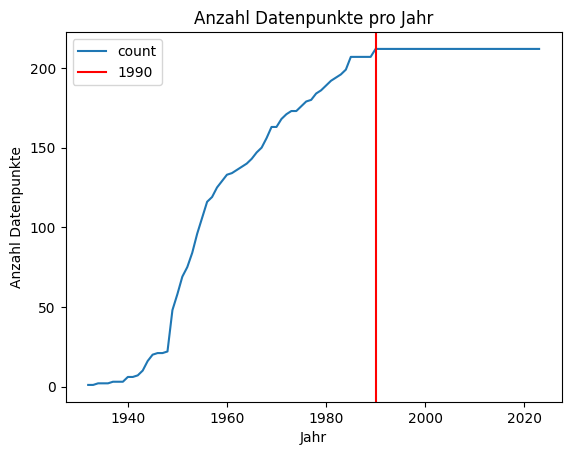

In [13]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1990, color='red',label='1990')
g.legend()

## 3.3 Analyse Säuglingssterblichkeit

In [14]:
df.describe()

,Jahr,Sterblichkeit
count,13577.000000,13577.000000
mean,1990.145909,5.332074
std,20.448355,4.911552
min,1932.000000,0.136684
25%,1974.000000,1.479416
50%,1991.000000,3.687661
75%,2007.000000,7.984322
max,2023.000000,47.249640


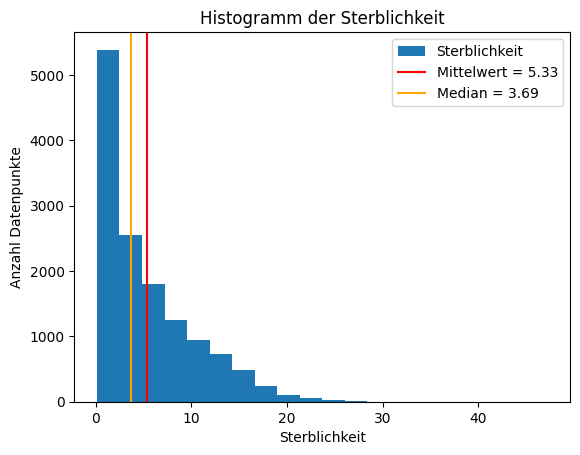

In [15]:
g = df['Sterblichkeit'].plot(kind='hist', bins=20, title='Histogramm der Sterblichkeit', 
                           xlabel='Sterblichkeit', ylabel='Anzahl Datenpunkte')
mean = df['Sterblichkeit'].mean()
g.axvline(x=df['Sterblichkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  

median = df['Sterblichkeit'].median()
g.axvline(x=df['Sterblichkeit'].median(), color='orange',label=  f'Median = {median:.2f}')  

g.legend()

In [16]:
df_pivot= df.pivot(index="Jahr", columns="Land", values="Sterblichkeit").dropna() # löscht na

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Beobachtungen

Ab 1990 haben alle 212 Länder Daten zur Säuglingssterblichkeitsrate vor. 
Die fünf Länder mit dem höchsten Rückgang der Säuglingssterblichkeit zwischen 1990 und 2023 sind:
East Timor, Liberia, Malawi, Mozambique, Afghanistan

Die fünf Länder mit dem geringsten Rückgang in diesem Zeitraum sind:
Sychelles, Niue, Botswana, Fiji, Dominica

### Interpretation

### Berechnungen

In [21]:
diffs = df_pivot.loc[2023] - df_pivot.loc[1990]
diffs = diffs.sort_values().dropna()
diffs

Land
East Timor    -12.842799
Liberia       -11.702428
Malawi        -10.374857
Mozambique    -10.131519
Afghanistan    -9.414805
                 ...    
Botswana       -0.067191
Seychelles      0.000091
Niue            0.018783
Fiji            0.245671
Dominica        1.817988
Length: 212, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Sterblichkeit 1990-2023'}, ylabel='Land'>

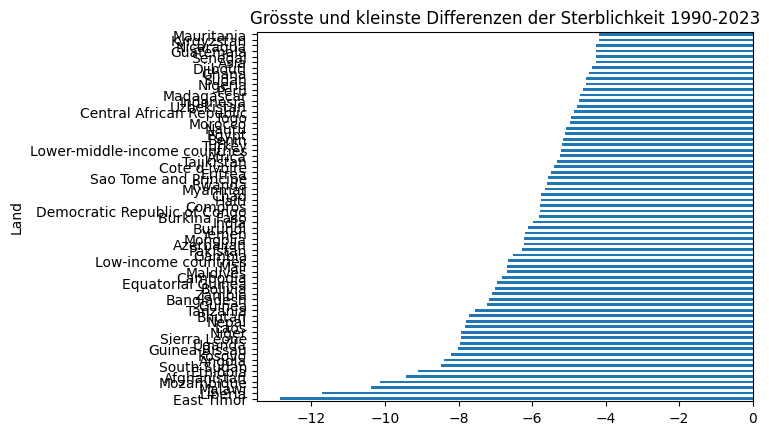

In [22]:
diff_sel = (diffs < -4) | (diffs > 5) 
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Sterblichkeit 1990-2023')

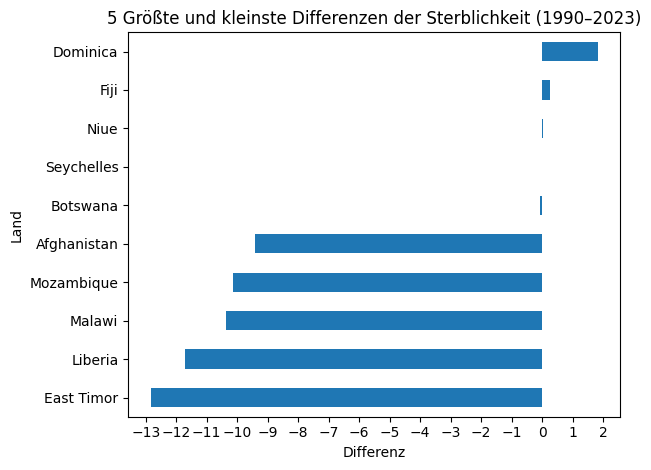

In [37]:

worst_5 = diffs.nsmallest(5)
best_5  = diffs.nlargest(5)

extreme_10 = pd.concat([worst_5, best_5])

ax = extreme_10.sort_values().plot(
    kind="barh",
    width=0.5,   # <-- statt height
    title="5 Größte und kleinste Differenzen der Sterblichkeit (1990–2023)",
    xlabel="Differenz",
    ylabel="Land"
)

# Tick-Abstand setzen
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.arange(int(xmin), int(xmax) + 1, 1))

plt.tight_layout()
plt.show()

In [38]:
Länder_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Länder_liste)

['East Timor', 'Liberia', 'Malawi', 'Mozambique', 'Afghanistan', 'Ethiopia', 'South Sudan', 'Angola', 'Kosovo', 'Guinea-Bissau', 'Uganda', 'Sierra Leone', 'Niger', 'Laos', 'Nepal', 'Bhutan', 'Tanzania', 'Guinea', 'Bangladesh', 'Zambia', 'Bolivia', 'Equatorial Guinea', 'Cambodia', 'Maldives', 'Mali', 'Low-income countries', 'Gambia', 'Pakistan', 'Azerbaijan', 'Mongolia', 'Yemen', 'Burundi', 'India', 'Burkina Faso', 'Democratic Republic of Congo', 'Comoros', 'Haiti', 'Chad', 'Myanmar', 'Rwanda', 'Sao Tome and Principe', 'Eritrea', "Cote d'Ivoire", 'Tajikistan', 'Africa', 'Lower-middle-income countries', 'Turkey', 'Benin', 'Egypt', 'Nauru', 'Morocco', 'Togo', 'Central African Republic', 'Uzbekistan', 'Indonesia', 'Madagascar', 'Peru', 'Nigeria', 'Sudan', 'Ghana', 'Djibouti', 'Asia', 'Senegal', 'Guatemala', 'Nicaragua', 'Kyrgyzstan', 'Mauritania']
